In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from enum import Enum

In [2]:
class Colors(Enum):
    blue = '#0A85FF'
    darkblue = '#00264D'
    green = '#99CC00'
    darkgreen = '#739900'

In [5]:
battleground_path = 'all-state-changes.csv'
df = pd.read_csv(battleground_path)

In [6]:
# Restructure data frame for easier access to Biden and Trump votes

def get_candidate_votes(row):
    if row['leading_candidate_name'] == 'Biden':
        row['biden_votes'] = row['leading_candidate_votes']
        row['trump_votes'] = row['trailing_candidate_votes']
    elif row['leading_candidate_name'] == 'Trump':
        row['biden_votes'] = row['trailing_candidate_votes']
        row['trump_votes'] = row['leading_candidate_votes']
    return row

df = df.apply(get_candidate_votes, axis=1)

In [90]:
class LinearRegression():
  def __init__(self, w, b):
    self.w = w
    self.b = b

  def fit(X,y):
    # Define the Linear Regression here
    w = np.cov(X[:,0],y)[0][1]/np.cov(X[:,0],y)[0][0]
    b = np.mean(y)-w*np.mean(X[:,0])
    return LinearRegression(w,b)
  
  def predict(self, x):
    """ 
    Define the line here.
    Map x to it's y coordinates. The set {(x,y) | x from input, y from output} 
    should define your line.
    In this case x will be percentages reported like
    np.linspace(0.94, 1, 100).reshape([-1,1]) from 94% to 100%
    in Georgia
    """
    y = self.w * x + self.b
    return y



[[ 0.00129609 -0.00086662]
 [-0.00086662  0.00058225]]
0.06681495526345255 0.8396491020408163
[[ 7.88160457e-05 -3.36675607e-05]
 [-3.36675607e-05  1.46716865e-05]]
0.015386579985879239 0.9526674184632393


/var/folders/jh/b3tk80gs6dj_c45mdzx3fv3h0000gp/T/ipykernel_19203/2601596698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_py['percent_reporting'] = df_py['total_votes_count'] / int(7e+6)
/var/folders/jh/b3tk80gs6dj_c45mdzx3fv3h0000gp/T/ipykernel_19203/2601596698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_py['trump_lead'] = (df_py['trump_votes'] - df_py['biden_votes']) / df_py['total_votes_count']
/var/folders/jh/b3tk80gs6dj_c45mdzx3fv3h0000gp/T/ipykernel_19203/2601596698.py:18: SettingW

Text(0.5, 0, "Trump's percentage lead")

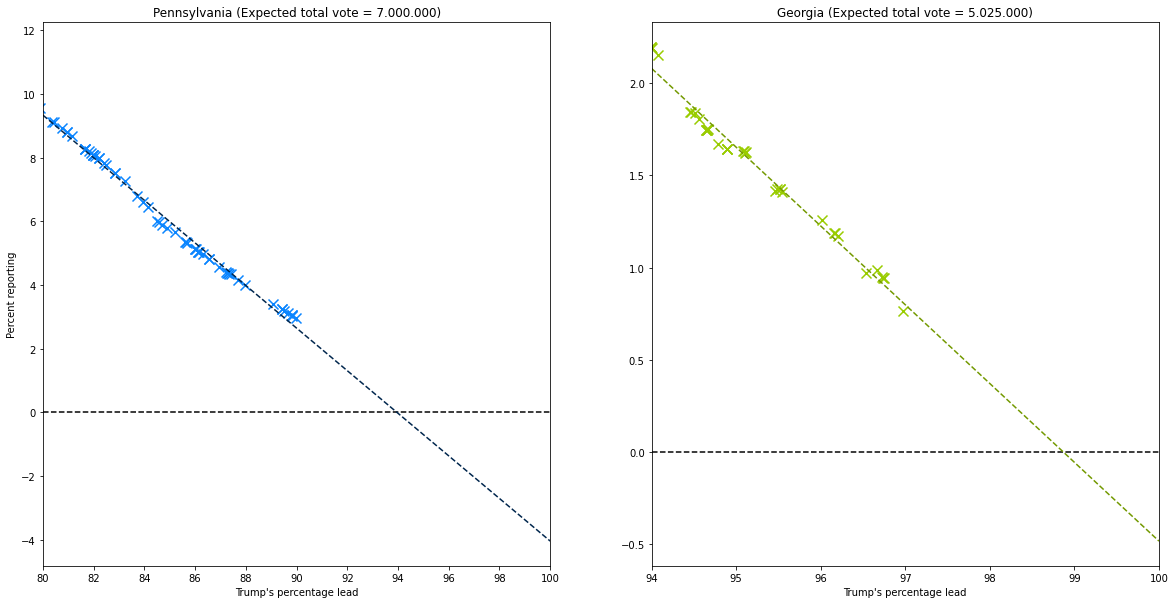

In [91]:
#Pennsylvania
df_py = df[df['state'] == 'Pennsylvania (EV: 20)']
df_py['percent_reporting'] = df_py['total_votes_count'] / int(7e+6)
df_py['trump_lead'] = (df_py['trump_votes'] - df_py['biden_votes']) / df_py['total_votes_count']
df_py = df_py.sort_values('percent_reporting', axis=0, ascending=False)

# Only view votes that were counted before 90% were reported
df_py = df_py[df_py['percent_reporting'] <= 0.9]

X = df_py['percent_reporting'].to_numpy().reshape([-1, 1])
y = df_py['trump_lead'].to_numpy()

# Fit X to y using Linear Regression
linear_py = LinearRegression.fit(X, y)

#Georgia
df_ga = df[df['state'] == 'Georgia (EV: 16)']
df_ga['percent_reporting'] = df_ga['total_votes_count'] / int(5.025e+6)
df_ga['trump_lead'] = (df_ga['trump_votes'] - df_ga['biden_votes']) / df_ga['total_votes_count']
df_ga = df_ga.sort_values('percent_reporting', axis=0, ascending=False)

# Only view votes that were counted before 97% were reported
df_ga = df_ga[df_ga['percent_reporting'] <= 0.97]

X = df_ga['percent_reporting'].to_numpy().reshape([-1, 1])
y = df_ga['trump_lead'].to_numpy()

# Fit X to y using Linear Regression
linear_ga = LinearRegression.fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(df_py['percent_reporting'] * 100, df_py['trump_lead'] * 100, marker='x', s=100, color=Colors.blue.value)
x = np.linspace(0.8, 1, 100).reshape([-1,1])
y = linear_py.predict(x)
ax[0].set_xlim([85, 100])
ax[0].set_xticks(range(80, 101, 2))
ax[0].plot(x * 100, y * 100, linestyle='--', color=Colors.darkblue.value)
ax[0].hlines(y=0, xmin=80, xmax=100, linestyle='--', color='black')
ax[0].set_title('Pennsylvania (Expected total vote = 7.000.000)')

ax[1].scatter(df_ga['percent_reporting'] * 100, df_ga['trump_lead'] * 100, marker='x', s=100, color=Colors.green.value)
x = np.linspace(0.94, 1, 100).reshape([-1,1])
y = linear_ga.predict(x)
ax[1].set_xlim([94, 100])
ax[1].set_xticks(range(94, 101, 1))
ax[1].plot(x * 100, y * 100, linestyle='--', color=Colors.darkgreen.value)
ax[1].hlines(y=0, xmin=94, xmax=100, linestyle='--', color='black')
ax[1].set_title('Georgia (Expected total vote = 5.025.000)')

ax[0].set_ylabel("Percent reporting")
ax[0].set_xlabel("Trump's percentage lead")
ax[1].set_xlabel("Trump's percentage lead")
# plt.savefig('trump_lead.svg', transparent=True)

In [79]:
import sklearn

sklearn.__file__


'/Users/maria/Library/Python/3.9/lib/python/site-packages/sklearn/__init__.py'

At what percentage of reported votes will Biden lead over Trump?